# Limits

Calculus distinguishes itself from Algebra by the concept of the Limit. It allows us to analyze the behavior of a function as it gets "arbitrarily close" to a specific input, even if the function is undefined at that exact input.

The concept of a "limit" didn't start with complex formulas. It started with a practical problem in ancient Greece: How do you measure curved shapes using only straight lines? Archimedes (c. 287–212 BC) wanted to calculate the area of a circle. He knew how to calculate the area of a triangle and a polygon, but a circle has no straight edges.His solution was the Method of Exhaustion. He inscribed a polygon inside the circle and increased the number of sides.
- A square (4 sides) is a clumsy approximation of a circle.
- A decagon (10 sides) is better.
- A chiliagon (1000 sides) is nearly indistinguishable from a circle.

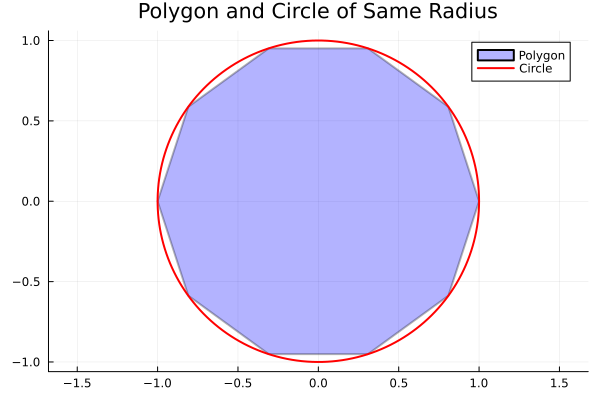

In [40]:
using Plots

n = 10              # number of sides of the polygon
R = 1.0            # radius of both polygon and circle

# Polygon vertices
θ = range(0, 2π, length=n+1)   # angles for polygon vertices
x_poly = R .* cos.(θ)
y_poly = R .* sin.(θ)

# Circle points
θ_circle = range(0, 2π, length=200)
x_circle = R .* cos.(θ_circle)
y_circle = R .* sin.(θ_circle)


plot(x_poly, y_poly, seriestype=:shape, label="Polygon", lw=2, color=:blue, alpha=0.3)
plot!(x_circle, y_circle, label="Circle", lw=2, color=:red)
plot!(legend=:topright, aspect_ratio=:equal, title="Polygon and Circle of Same Radius")


Archimedes realized that while the polygon never becomes the circle, the difference between their areas becomes arbitrarily small as the number of sides $n$ approaches infinity.  

As $n \to \infty$, the Area $\to \pi$. This is a limit.

In [41]:
using Printf

# Assuming Radius is 1
polygon_area(n) = (n / 2) * sin(2 * π / n)

sides = [4, 8, 16, 100, 1000, 10000, 100000]

println("Approximating Pi using Polygons:")
println("--------------------------------")
for n in sides
    area = polygon_area(n)
    @printf("Sides: %6d | Area: %.8f | Diff from Pi: %.9f\n", n, area, abs(π - area))

end

Approximating Pi using Polygons:
--------------------------------
Sides:      4 | Area: 2.00000000 | Diff from Pi: 1.141592654
Sides:      8 | Area: 2.82842712 | Diff from Pi: 0.313165529
Sides:     16 | Area: 3.06146746 | Diff from Pi: 0.080125195
Sides:    100 | Area: 3.13952598 | Diff from Pi: 0.002066677
Sides:   1000 | Area: 3.14157198 | Diff from Pi: 0.000020671
Sides:  10000 | Area: 3.14159245 | Diff from Pi: 0.000000207
Sides: 100000 | Area: 3.14159265 | Diff from Pi: 0.000000002


## The Formal Definition ($\epsilon - \delta$)

While intuition is great, mathematics requires proof. This leads us to the formal definition of a limit.
$$\underset{x \rightarrow c}{\lim} f(x) = L$$

Definition:The limit of $f(x)$ as $x$ approaches $c$ is $L$ if, for every $\epsilon > 0$ (no matter how small), there exists a $\delta > 0$ such that:
$$\text{if } 0 < |x - c| < \delta \text{ then } |f(x) - L| < \epsilon$$

Interpretation
- $\epsilon$ (Epsilon): The error tolerance on the Y-axis (output). i.e. how close you want (f(x)) to be to the limit. (Target accuracy)
- $\delta$ (Delta): The required closeness on the X-axis (input). i.e. how close we must take (x) to the input point. (Control precision)

Meaning: If you demand the output stays within a tiny range of $L$ ($\epsilon$), I can find a range around $c$ ($\delta$) where that condition is always guaranteed. Limit formalize what it means for a function to approach a value, even at points where the function is undefined or behaves strangely.

In [ ]:
# Let's find a delta for a specific epsilon for f(x) at x=1
# Target Limit L = 2
f(x) = (x^2 - 1)/(x - 1)
L = 2
c = 1

epsilon = 0.1

# We want |f(x) - L| < epsilon
# |(x+1) - 2| < 0.1
# |x - 1| < 0.1
# Therefore, delta should be 0.1

delta = 0.1

println("Formal Check:")
println("If we restrict x to be within $delta of $c...")
@show x_input = 1.05  # This is within delta (1.05 - 1 = 0.05 < 0.1)
@show output = f(x_input)
@show distance_from_L = abs(output - L)
@show distance_from_L < epsilon


Formal Check:
If we restrict x to be within 0.1 of 1...
x_input = 1.05 = 1.05
output = f(x_test) = 2.049999999999999
distance_from_L = abs(y_val - L) = 0.049999999999998934
dist < epsilon = true


true

### The Problem of Division by Zero

Consider the function:
$$f(x) = \frac{x^2 - 1}{x - 1}$$

If we try to evaluate $f(1)$, we get $\frac{0}{0}$, which is undefined (an indeterminate form). However, if we simplify algebraically:

$\frac{(x-1)(x+1)}{(x-1)} = x+1 \quad \text{for} x \neq 1 $ 

We expect the value to be 1+1=2

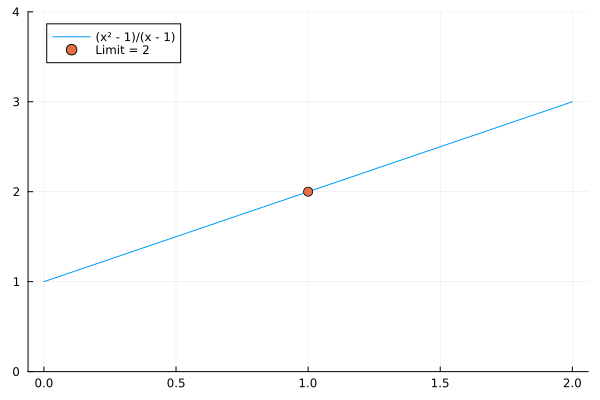

In [42]:
using Plots
f(x) = (x^2 - 1) / (x - 1)   # = x+1 for x ≠ 1, direct substitution at x=1 leads to 0/0, but algebraic manipulation gets us limit 2.

plot(f, 0, 2, label="(x² - 1)/(x - 1)", ylim=(0,4))
scatter!([1], [2], label="Limit = 2", markersize=5)

In [43]:
using Printf

# Generate values close to 1 from the left and right
x_left  = [0.9, 0.99, 0.999, 0.9999]
x_right = [1.1, 1.01, 1.001, 1.0001]

println("Approaching from left (x -> 1⁻):")
for x in x_left
    @printf("x: %.5f | f(x): %.5f\n", x, f(x))
end

println("\nApproaching from right (x -> 1⁺):")
for x in x_right
    @printf("x: %.5f | f(x): %.5f\n", x, f(x))
end

Approaching from left (x -> 1⁻):
x: 0.90000 | f(x): 1.90000
x: 0.99000 | f(x): 1.99000
x: 0.99900 | f(x): 1.99900
x: 0.99990 | f(x): 1.99990

Approaching from right (x -> 1⁺):
x: 1.10000 | f(x): 2.10000
x: 1.01000 | f(x): 2.01000
x: 1.00100 | f(x): 2.00100
x: 1.00010 | f(x): 2.00010


## Indeterminate Forms

For most functions, $L = \underset{x \rightarrow c}{\lim} f(x) =f(c)$, these functions are said to be continuous at point c of its domain. 
Not all functions behave nicely. Sometimes limits result in Indeterminate Forms. These are expressions where the limit cannot be determined solely by the limits of the individual parts.

However, we can find functions that are not continuous, yielding indeterminate forms, such as:
 
- $\underset{x \to 0}{\lim} \frac{\sin x}{x}$ -> Direct substitution gives $\frac{0}{0}$. But actually evaluates to 1 after applying L'Hôpital’s Rule.
- $\underset{x \to \infty}{\lim} \frac{x}{\ln x}$ -> $\frac{\infty}{\infty}$ evaluates to $\infty$
- $\underset{x \to 0^+}{\lim} x \cdot \ln x$ -> $0 \cdot \infty$  actually evaluates to 0
- $\underset{x \to \infty}{\lim} \left( \sqrt{x^2+1} - x \right)$  -> $\infty - \infty$ actually evaluates to 0
- $\underset{x \to 0^+}{\lim} x^x$ -> $0^0$ actually evaluates to 1
- $\underset{x \to \infty}{\lim} \left(1 + \frac{1}{x}\right)^x$ -> $1^\infty$ actually evaluates to $e$
- $\underset{x \to 0^+}{\lim} \left(\frac{1}{x}\right)^x$ -> $\infty^0$ actually evaluates to 1


In [44]:
# Julia representations of indeterminate forms
forms = [
    0/0,       # NaN (Not a Number)
    Inf/Inf,   # NaN
    0 * Inf,   # NaN
    Inf - Inf, # NaN
    0^0,       # 1 (Defined by IEEE convention, but often indeterminate in calc)
    1.0^Inf,   # 1.0  (does not mean the calculus limit is 1)
    Inf^0      # 1.0 (Careful! Limits might differ)
]'

display(forms)

1×7 adjoint(::Vector{Float64}) with eltype Float64:
 NaN  NaN  NaN  NaN  1.0  1.0  1.0

## Limits at Infinity and Asymptotes

We are often interested in the "End Behavior" of a function—what happens as $x$ grows very large?

$$\underset{x \to \infty}{\lim} f(x)$$

Consider $f(x) = \frac{3x + 2}{x - 5}$. As $x$ gets huge, the $+2$ and $-5$ become insignificant. The function should behave like $\frac{3x}{x} = 3$.


Another common example is $\underset{x\to\infty}{\lim} \frac{1}{x}=0$

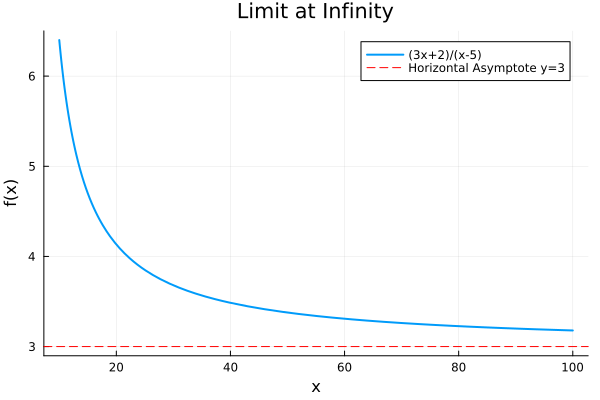

In [45]:
g(x) = (3x + 2) / (x - 5)

# We plot over a large range
plot(g, 10, 100, label="(3x+2)/(x-5)", lw=2, xlabel="x", ylabel="f(x)")
hline!([3], label="Horizontal Asymptote y=3", linestyle=:dash, color=:red)
title!("Limit at Infinity")

## Infinite Limits

A limit can be infinite when the function grows without bound:

$\underset{x\to 0^+}{\lim} \frac{1}{x} = +\infty$

This does **not** mean the limit exists as a real number—rather, the function diverges positively.


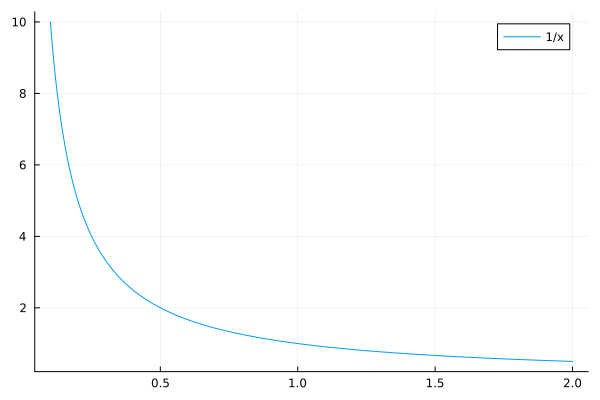

In [46]:
plot(x -> 1/x, 0.1, 2, label="1/x")

## One-Sided Limits

We approach the limit of function from left hand side, and the right hand side. For a limit to exist, the Left-Hand Limit must equal the Right-Hand Limit.$$\underset{x \to c^-} f(x) = \underset{x \to c^+} f(x) = L$$

i.e. approaching from a left hand must equal to approach from the right hand.

Example: Jump discontinuity

$
f(x)=
\begin{cases}
1 & x<0 \\
2 & x\ge0
\end{cases}
$

Left limit = 1
Right limit = 2
Limit does **not** exist.


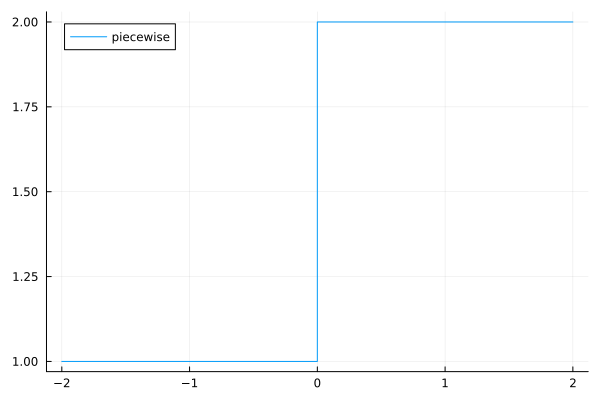

In [47]:
using Plots
f(x) = x < 0 ? 1 : 2
plot(f, -2, 2, seriestype=:steppre, label="piecewise")

## The Squeeze Theorem

If $g(x) \leq f(x) \leq h(x)$ near $c$, and:$$\underset{x \to c}{\lim} g(x) = \underset{x \to c}{\lim} h(x) = L$$
Then $\underset{x \to c}{\lim} f(x) = L$.

Classic Application: $\underset{x \to 0}{\lim} \frac{\sin x}{x} = 1$.

This is hard to prove algebraically, but we can "squeeze" it between $\cos(x)$ and $1$.

$\cos x \le \frac{\sin x}{x} \le 1$

As $x\to 0$: $\lim\cos x = 1 = \lim 1$

Thus: $\underset{x\to 0}{\lim}\frac{\sin x}{x}=1$

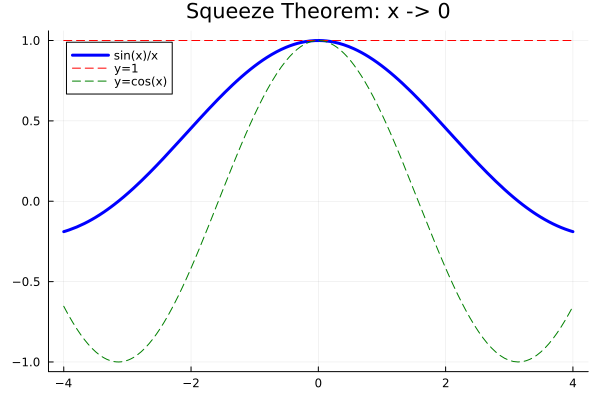

In [48]:
upper_bound(x) = 1
lower_bound(x) = cos(x)
target_func(x) = sin(x)/x

plot(target_func, -4, 4, label="sin(x)/x", lw=3, color=:blue)
plot!(upper_bound, -4, 4, label="y=1", linestyle=:dash, color=:red)
plot!(lower_bound, -4, 4, label="y=cos(x)", linestyle=:dash, color=:green)

title!("Squeeze Theorem: x -> 0")

## ALGEBRAIC TECHNIQUES

These techniques simplify indeterminate forms like (0/0).

**Factorization**: Use algebraic factorization to eliminate a zero in denominator.

$\underset{x\to 4}{\lim} \frac{x^2 - 16}{x - 4}
= \underset{x\to4}{\lim} \frac{(x-4)(x+4)}{x-4}
= \underset{x\to4}{\lim} (x+4) = 8
$

**Rationalization**: Useful for square roots.

$\underset{x\to 0}{\lim} \frac{\sqrt{x+4} - 2}{x}$

Multiply numerator & denominator by conjugate:

$\frac{\sqrt{x+4} - 2}{x} \cdot \frac{\sqrt{x+4} + 2}{\sqrt{x+4} + 2} =  \frac{x}{x(\sqrt{x+4}+2)} = \frac{1}{\sqrt{x+4}+2}$

Now take limit:
$= \frac{1}{4}$


**Standard Limit Forms**: Important memorized limits:

- $\underset{x\to 0}{\lim} \frac{\sin x}{x} = 1$
- $\underset{x\to 0}{\lim} \frac{1 - \cos x}{x^2} = \frac{1}{2}$
- $\underset{x\to 0}{\lim} \frac{e^x - 1}{x} = 1 $

These will be foundational for differentiation.

## Limit Laws

Limits respect arithmetic:

- Sum Rule: $\lim(f+g)=\lim f + \lim g$
- Product Rule: $\lim(fg)= (\lim f)(\lim g)$
- Quotient Rule: $\lim(f/g)= (\lim f)/(\lim g)$ if denominator ≠ 0
- Power and root rules

These laws allow piecewise combination without graphing.

Practice Questions

- $\underset{x \to 0}{\lim} \frac{e^x - \cos x}{x}$  --> 1


### Continuity & The Intermediate Value Theorem (IVT)

A function is continuous at $c$ if:
- $f(c)$ is defined.
- The limit exists.
- The limit equals the function value.

**Intermediate Value Theorem**:If $f$ is continuous on $[a, b]$ and $k$ is between $f(a)$ and $f(b)$, there must be some $c \in [a, b]$ such that $f(c) = k$.This is crucial for finding roots (where $f(c) = 0$).

Interpretation: A continuous function cannot “jump over” values. This guarantees at least one root in a sign change.

Example: Root existence

If $f(1) = -3,\quad f(3)=19$

Since 0 lies between -3 and 19, IVT says: $\exists c \in (1, 3) \text{ such that } f(c)=0$


f(1) = -3
f(3) = 19
Root found at x ≈ 1.7692923542386314


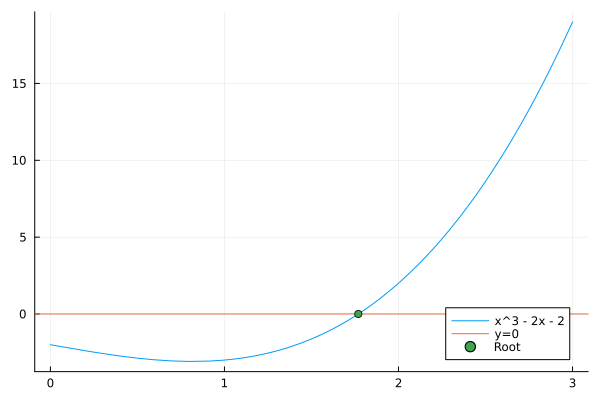

In [49]:
using Roots

poly(x) = x^3 - 2x - 2

# Check signs at endpoints
a, b = 1, 3
println("f(1) = ", poly(1)) # Negative
println("f(3) = ", poly(3)) # Positive

# Since signs change, a root exists. Let's find it.
root = find_zero(poly, (1, 3))
println("Root found at x ≈ ", root)

plot(poly, 0, 3, label="x^3 - 2x - 2", legend=:bottomright)
hline!([0], label="y=0")
scatter!([root], [0], label="Root")

### L’Hôpital’s Rule (uses Derivatives)

When direct substitution results in indeterminate forms $\frac{0}{0}$ or $\frac{\infty}{\infty}$, we can use derivatives to find the limit.

Theorem:
$$\underset{x \to c}{\lim} \frac{f(x)}{g(x)} = \underset{x \to c}{\lim} \frac{f'(x)}{g'(x)} $$

**provided**:
- f(x) and g(x) are differentiable near c,
- $g'(x) \neq 0$ near c,
- and the new limit exists (finite or infinite).

Example:
$$\underset{x \to 0}{\lim} \frac{\sin x}{x} \quad \left( \frac{0}{0} \text{ form} \right)$$

Apply L'Hôpital Rule:
$$\underset{x \to 0}{\lim} \frac{\cos x}{1} = 1 $$


Example:
$$\underset{x \to \infty}{\lim} \frac{x}{\ln x} \quad \left( \frac{\infty}{\infty}\text{ form} \right) $$

Apply L’Hôpital’s Rule:
$$\underset{x \to \infty}{\lim} \frac{1}{1/x} = \underset{x \to \infty}{\lim} x = \infty$$


In [50]:
h(x) = sin(x)/x
h_prime_ratio(x) = cos(x)/1 # Derived analytically

x_val = 0.00001
println("Original Function close to 0: ", h(x_val))
println("Ratio of Derivatives at 0:    ", h_prime_ratio(0))

Original Function close to 0: 0.9999999999833332
Ratio of Derivatives at 0:    1.0


## Additional References

- [Calculus with Julia, Limits](https://jverzani.github.io/CalculusWithJuliaNotes.jl/limits/limits.html)
- [Investigating limits with Julia](https://mth229.github.io/limits.html#limits-at-infinity)